<font face="微軟正黑體">

## 檢視與處理 Outliers

### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

### [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

### [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [1]:
import os
import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

dir_data = '../data/'
csv_file = "application_train.csv"

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
f_app = os.path.join(dir_data, csv_file)
print('Path of read in data: %s' % (f_app))

app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<font face="微軟正黑體">

#### 請參考 HomeCredit_columns_description.csv 的欄位說明

- 觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [3]:
"""
YOUR CODE HERE, fill correct data types and select numeric column exclude only two data (0, 1) 
"""

select_numeric_dtype = [np.dtype("int64"), np.dtype("float64")]
select_non_two_data = lambda x: len(x.unique()) != 2

numeric_columns = app_train.columns[app_train.dtypes.isin(select_numeric_dtype)]
numeric_columns = numeric_columns[app_train[numeric_columns].apply(select_non_two_data)].tolist()

print("Head 5 of remain columns: {}".format(numeric_columns[:5]))
print("Numbers of remain columns: {}".format(len(numeric_columns)))

Head 5 of remain columns: ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
Numbers of remain columns: 73


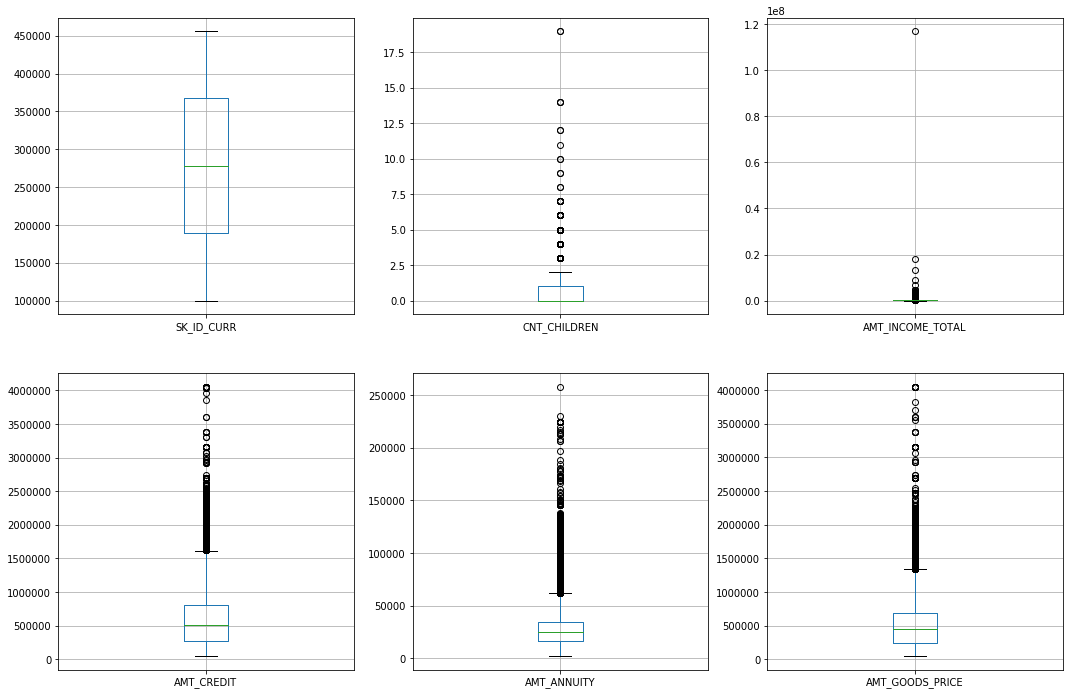

In [4]:
"""
Your CODE HERE, make the box plot (Head 6)
"""

plt.figure(figsize=(18, 12))
count = 6

for idx, column in enumerate(numeric_columns[:count]):
    plt.subplot(2, count//2, idx+1)
    app_train.boxplot(column=column)
    
plt.show()

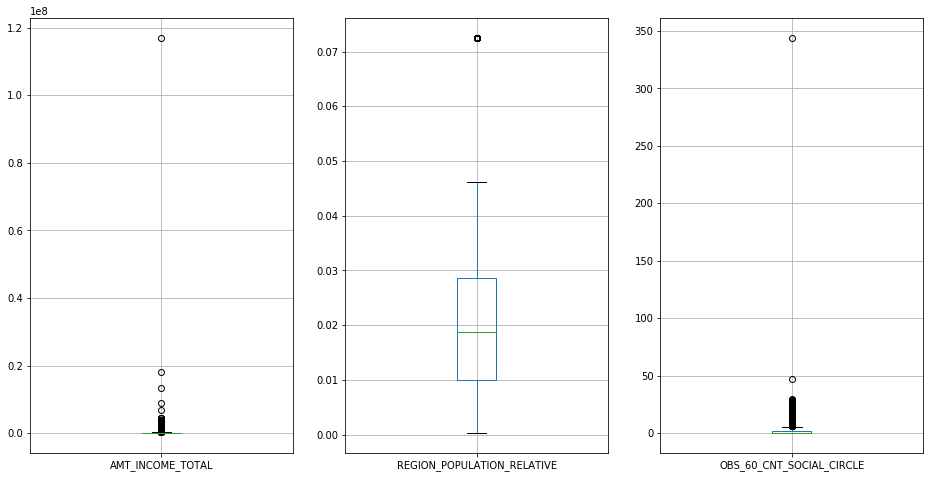

In [5]:
"""
Your CODE HERE, make the box plot (suspicious columns)
"""

plt.figure(figsize=(16, 8))
suspicious_columns = ["AMT_INCOME_TOTAL", "REGION_POPULATION_RELATIVE", "OBS_60_CNT_SOCIAL_CIRCLE"]

for idx, column in enumerate(suspicious_columns):
    plt.subplot(1, len(suspicious_columns), idx+1)
    app_train.boxplot(column=column)
    
plt.show()

<font face="微軟正黑體">

### Hints: Empirical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

發現欄位 AMT_INCOME_TOTAL 最大值離平均與中位數很遠


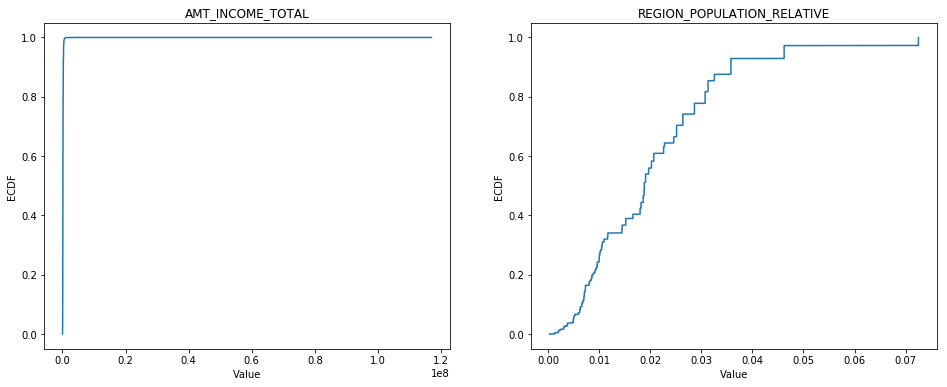

In [6]:
# Draw Empirical Cumulative Density Plot - method 1 (use package)

def draw_ecdf(idx, column):
    
    cdf = sm.distributions.ECDF(app_train[column])
    plt.subplot(1, 2, idx)
    plt.plot(cdf.x, cdf.y)
    
    plt.xlabel('Value') 
    plt.ylabel('ECDF')
    plt.title(column)

plt.figure(figsize=(16, 6))
draw_ecdf(1, "AMT_INCOME_TOTAL")
draw_ecdf(2, "REGION_POPULATION_RELATIVE")

plt.show()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


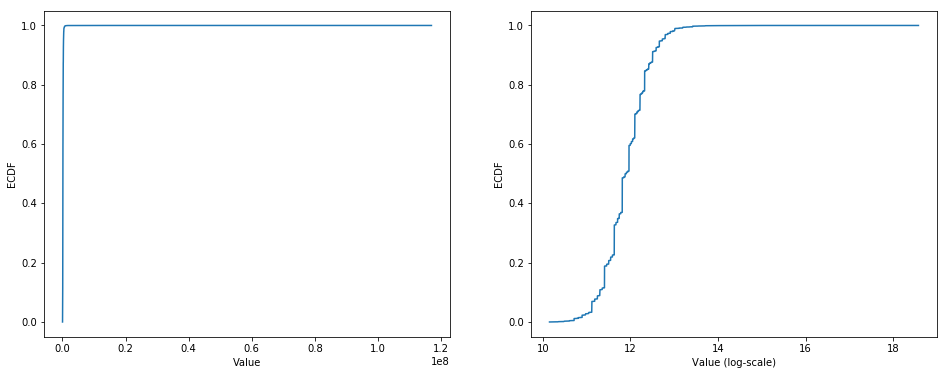

In [7]:
# Draw Empirical Cumulative Density Plot - method 2 (use numpy)

print(app_train['AMT_INCOME_TOTAL'].describe())

plt.figure(figsize=(16, 6))
cdf = np.cumsum(app_train['AMT_INCOME_TOTAL'].value_counts().sort_index()) 

plt.subplot(1, 2, 1)
plt.plot(list(cdf.index), cdf / cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')

plt.subplot(1, 2, 2)
plt.plot(np.log(list(cdf.index)), cdf / cdf.max())  # 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

# plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
# plt.ylim([-0.05, 1.05]) # 限制顯示圖片的範圍
plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

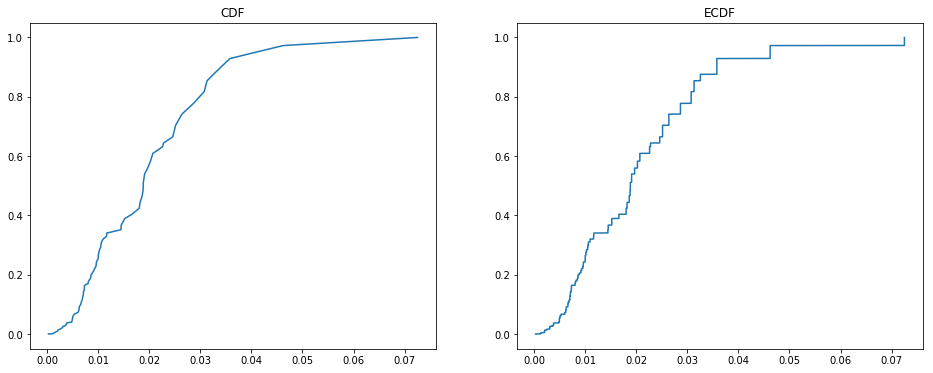

In [8]:
# CDF vs ECDF

plt.figure(figsize=(16, 6))

cdf = np.cumsum(app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index())
x, y = list(cdf.index), cdf / cdf.max()

plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title('CDF')

x = np.sort(app_train['REGION_POPULATION_RELATIVE'])
y = np.arange(1, len(x)+1) / len(x)

plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.title('ECDF')

plt.show()

<font face="微軟正黑體">

### REGION_POPULATION_RELATIVE 最大值落在分布之外

就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏


count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


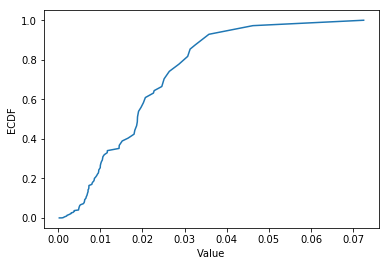

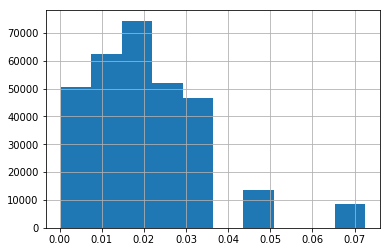

In [9]:
print(app_train['REGION_POPULATION_RELATIVE'].describe())

cdf = np.cumsum(app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index()) 

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

<font face="微軟正黑體">

### 注意：當 histogram 畫出下面這種圖

只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


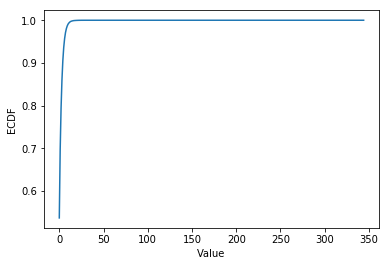

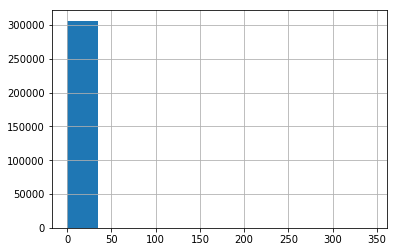

In [10]:
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

cdf = np.cumsum(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index()) 

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()

In [11]:
value_counts = app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False)
print(value_counts[value_counts.index > 20])

344.0     1
47.0      1
30.0      1
29.0      2
28.0      1
27.0      5
26.0      1
25.0     11
24.0     12
23.0     13
22.0     20
21.0     28
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


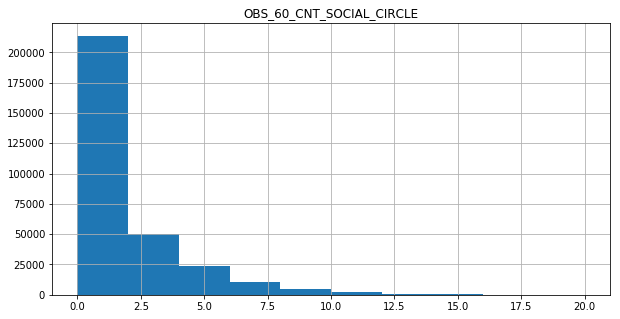

In [12]:
# 把一些極端值暫時去掉，在繪製一次 Histogram，選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製

loc_a = app_train["OBS_60_CNT_SOCIAL_CIRCLE"] <= 20
loc_b = ['OBS_60_CNT_SOCIAL_CIRCLE']

app_train.loc[loc_a, loc_b].hist(figsize=(10, 5))
plt.show()